Plotting 22 mutations


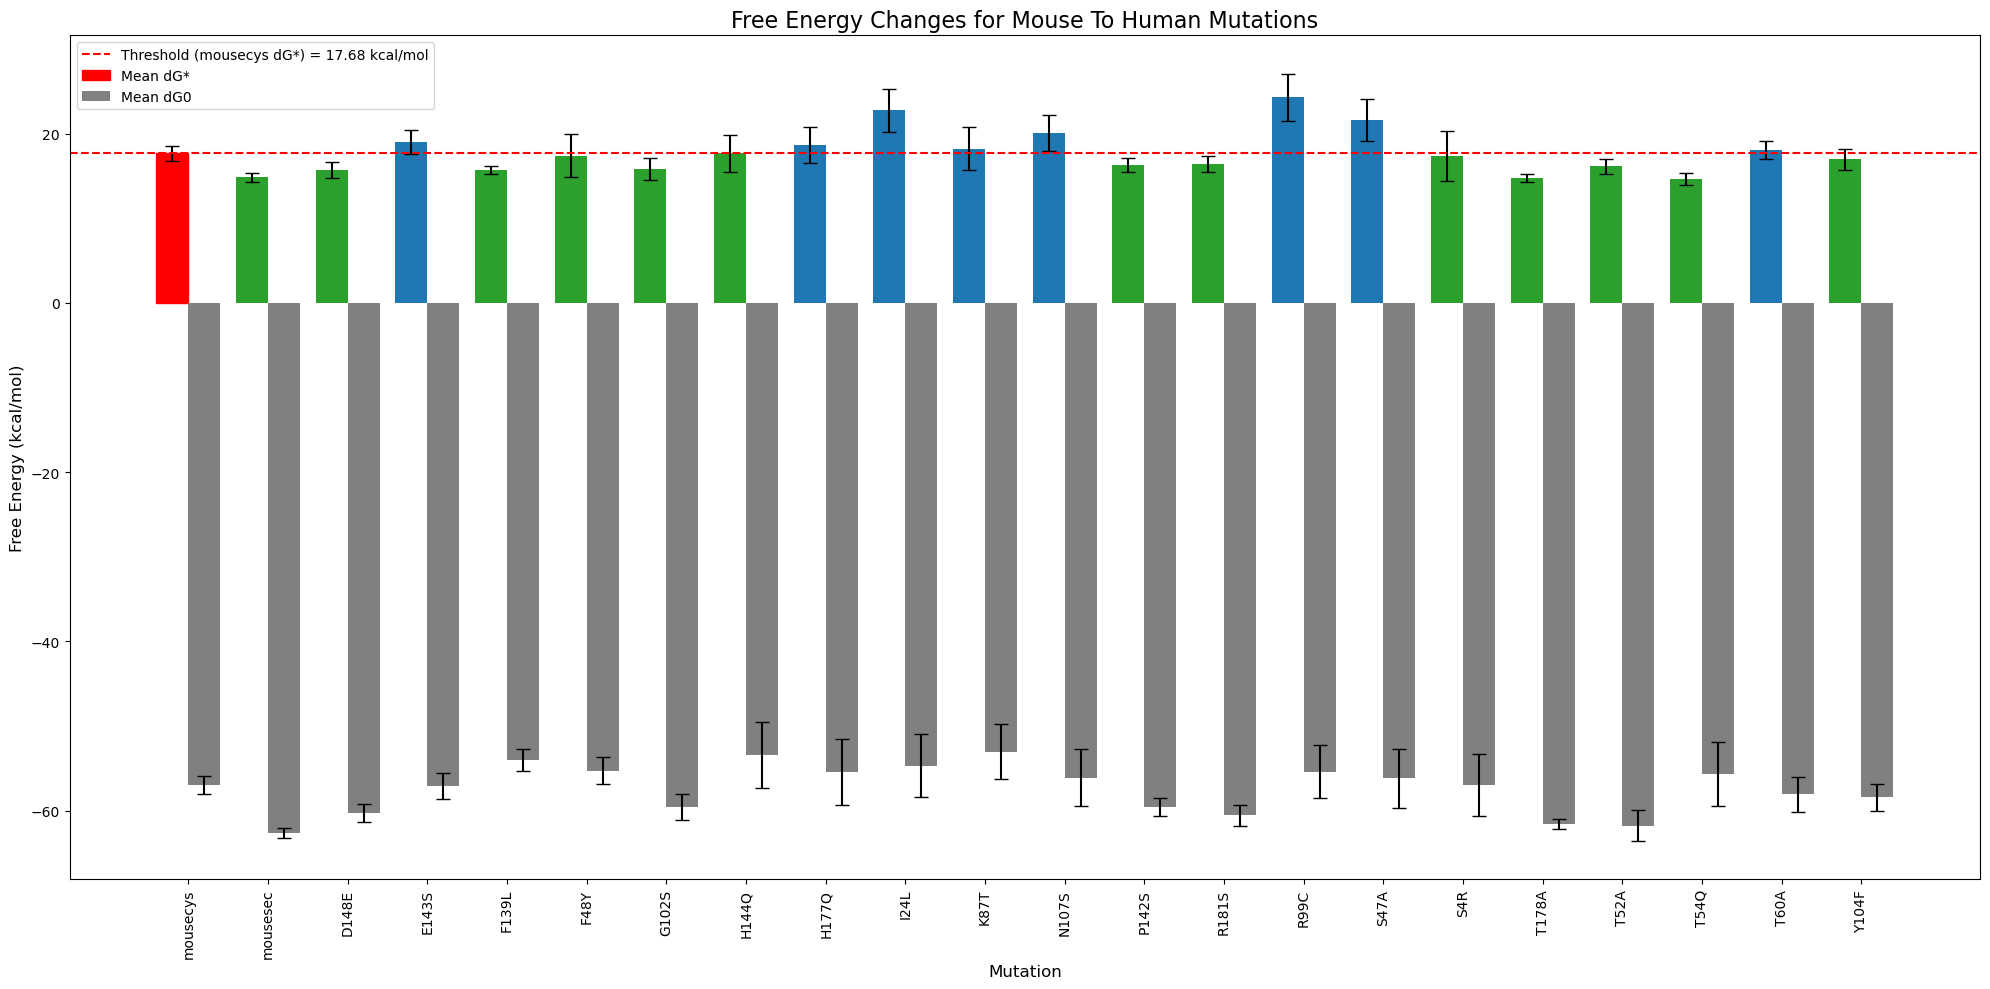

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Let's manually define all data to ensure we capture everything
data = [
    {"mutation": "mousecys", "dg_star": 17.68, "dg_star_error": 0.91, "dg0": -56.96, "dg0_error": 1.03},
    {"mutation": "mousesec", "dg_star": 14.84, "dg_star_error": 0.52, "dg0": -62.60, "dg0_error": 0.59},
    {"mutation": "D148E", "dg_star": 15.68, "dg_star_error": 0.94, "dg0": -60.30, "dg0_error": 1.09},
    {"mutation": "E143S", "dg_star": 19.04, "dg_star_error": 1.40, "dg0": -57.10, "dg0_error": 1.56},
    {"mutation": "F139L", "dg_star": 15.72, "dg_star_error": 0.48, "dg0": -54.00, "dg0_error": 1.27},
    {"mutation": "F48Y", "dg_star": 17.38, "dg_star_error": 2.54, "dg0": -55.26, "dg0_error": 1.54},
    {"mutation": "G102S", "dg_star": 15.83, "dg_star_error": 1.30, "dg0": -59.61, "dg0_error": 1.52},
    {"mutation": "H144Q", "dg_star": 17.66, "dg_star_error": 2.18, "dg0": -53.40, "dg0_error": 3.89},
    {"mutation": "H177Q", "dg_star": 18.66, "dg_star_error": 2.09, "dg0": -55.40, "dg0_error": 3.89},
    {"mutation": "I24L", "dg_star": 22.74, "dg_star_error": 2.54, "dg0": -54.69, "dg0_error": 3.73},
    {"mutation": "K87T", "dg_star": 18.21, "dg_star_error": 2.52, "dg0": -53.05, "dg0_error": 3.25},
    {"mutation": "N107S", "dg_star": 20.05, "dg_star_error": 2.12, "dg0": -56.09, "dg0_error": 3.33},
    {"mutation": "P142S", "dg_star": 16.30, "dg_star_error": 0.87, "dg0": -59.56, "dg0_error": 1.10},
    {"mutation": "R181S", "dg_star": 16.38, "dg_star_error": 0.97, "dg0": -60.55, "dg0_error": 1.26},
    {"mutation": "R99C", "dg_star": 24.29, "dg_star_error": 2.79, "dg0": -55.41, "dg0_error": 3.13},
    {"mutation": "S47A", "dg_star": 21.57, "dg_star_error": 2.46, "dg0": -56.18, "dg0_error": 3.49},
    {"mutation": "S4R", "dg_star": 17.37, "dg_star_error": 2.94, "dg0": -56.97, "dg0_error": 3.69},
    {"mutation": "T178A", "dg_star": 14.77, "dg_star_error": 0.51, "dg0": -61.57, "dg0_error": 0.57},
    {"mutation": "T52A", "dg_star": 16.16, "dg_star_error": 0.89, "dg0": -61.77, "dg0_error": 1.79},
    {"mutation": "T54Q", "dg_star": 14.62, "dg_star_error": 0.68, "dg0": -55.68, "dg0_error": 3.78},
    {"mutation": "T60A", "dg_star": 18.09, "dg_star_error": 1.04, "dg0": -58.09, "dg0_error": 2.08},
    {"mutation": "Y104F", "dg_star": 16.94, "dg_star_error": 1.28, "dg0": -58.41, "dg0_error": 1.58}
]

# Extract data into lists
mutations = [item['mutation'] for item in data]
dg_star_values = [item['dg_star'] for item in data]
dg_star_errors = [item['dg_star_error'] for item in data]
dg0_values = [item['dg0'] for item in data]
dg0_errors = [item['dg0_error'] for item in data]

# Find mousecys dG* value
mousecys_dg_star = None
for item in data:
    if item['mutation'] == 'mousecys':
        mousecys_dg_star = item['dg_star']
        break

# Ensure we have a threshold
if mousecys_dg_star is None:
    mousecys_dg_star = 17.68  # Default value if not found

# Color scheme: green if dG* < mousecys, blue if dG* > mousecys
colors = ['#2ca02c' if dg_star < mousecys_dg_star else '#1f77b4' for dg_star in dg_star_values]

# Plot the data
fig, ax = plt.subplots(figsize=(20, 10))

# X-axis positions
x = np.arange(len(mutations))

# Bar width
bar_width = 0.4

# Bar plot for dG*
bars1 = ax.bar(x - bar_width/2, dg_star_values, yerr=dg_star_errors, capsize=5, 
               label="Mean dG*", color=colors, width=bar_width, align='center')

# Bar plot for dG0 (with error bars)
bars2 = ax.bar(x + bar_width/2, dg0_values, yerr=dg0_errors, capsize=5,
               color='gray', width=bar_width, align='center', label="Mean dG0")

# Highlight mousecys in red
mousecys_index = mutations.index("mousecys")
bars1[mousecys_index].set_color('red')

# Annotate mousecys threshold
ax.axhline(mousecys_dg_star, color='red', linestyle='--', label=f'Threshold (mousecys dG*) = {mousecys_dg_star:.2f} kcal/mol')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
ax.set_xlabel("Mutation", fontsize=12)
ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
ax.set_title("Free Energy Changes for Mouse To Human Mutations", fontsize=16)
ax.legend(loc='upper left', fontsize=10, frameon=True)

# Print confirmation of number of mutations
print(f"Plotting {len(mutations)} mutations")

# Adjust layout
plt.tight_layout()
plt.show()

Skipping A60T due to nan values
Skipping R4S due to nan values
Skipping Y48F due to nan values
Skipping A47S due to nan values
Y48F mutation not found or has nan values.
Using average dG* as threshold: 18.23 kcal/mol


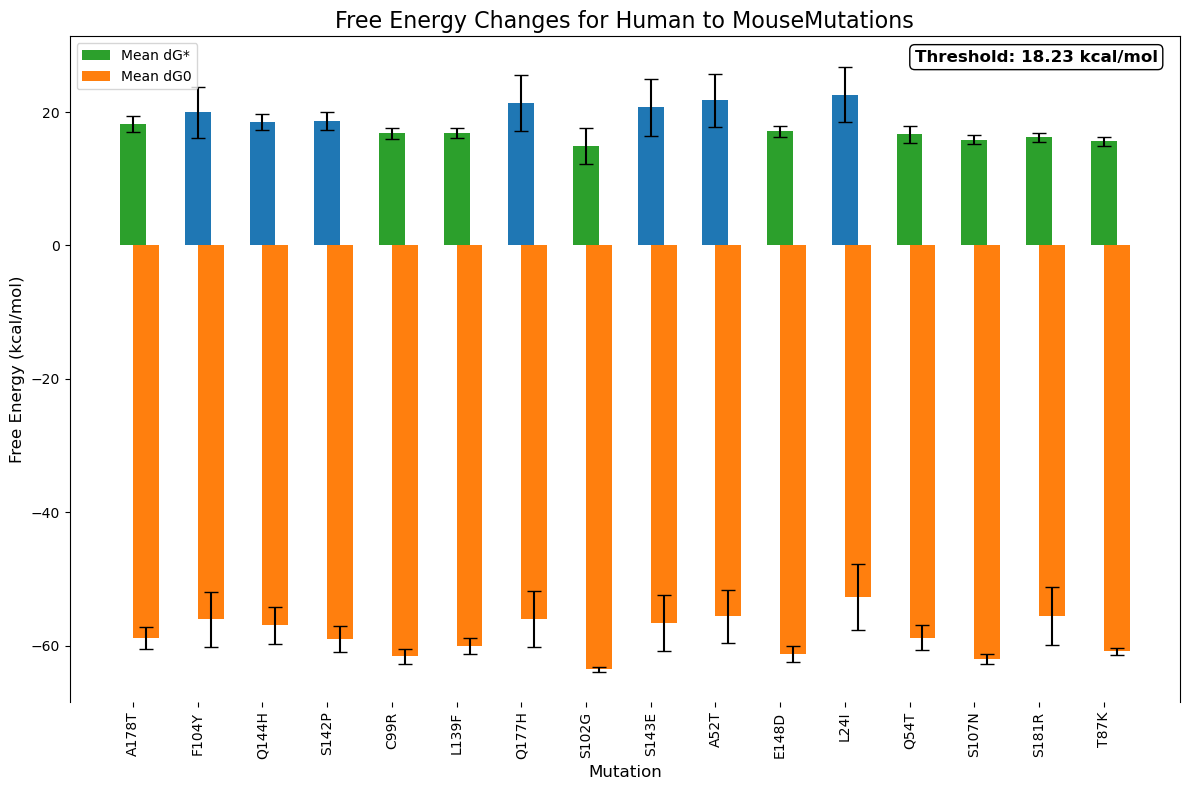

In [17]:
import re
import matplotlib.pyplot as plt

# Updated LaTeX table string from first document
latex_table = r"""
\documentclass{article}
\usepackage{booktabs}
\begin{document}
\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|}
\hline
Mutation & Mean dG* & Mean dG0 \\
\hline
A178T & 18.18 \pm 1.16 kcal/mol & -58.83 \pm 1.68 kcal/mol \\
\hline
A60T & 17.12 \pm nan kcal/mol & -62.66 \pm nan kcal/mol \\
\hline
F104Y & 19.94 \pm 3.88 kcal/mol & -56.06 \pm 4.18 kcal/mol \\
\hline
Q144H & 18.47 \pm 1.20 kcal/mol & -56.95 \pm 2.80 kcal/mol \\
\hline
R4S & nan \pm nan kcal/mol & nan \pm nan kcal/mol \\
\hline
S142P & 18.72 \pm 1.34 kcal/mol & -59.02 \pm 1.95 kcal/mol \\
\hline
Y48F & nan \pm nan kcal/mol & nan \pm nan kcal/mol \\
\hline
A47S & nan \pm nan kcal/mol & nan \pm nan kcal/mol \\
\hline
C99R & 16.80 \pm 0.78 kcal/mol & -61.57 \pm 1.12 kcal/mol \\
\hline
L139F & 16.86 \pm 0.75 kcal/mol & -60.03 \pm 1.26 kcal/mol \\
\hline
Q177H & 21.33 \pm 4.17 kcal/mol & -55.99 \pm 4.15 kcal/mol \\
\hline
S102G & 14.86 \pm 2.71 kcal/mol & -63.51 \pm 0.36 kcal/mol \\
\hline
S143E & 20.72 \pm 4.27 kcal/mol & -56.57 \pm 4.20 kcal/mol \\
\hline
A52T & 21.73 \pm 3.99 kcal/mol & -55.61 \pm 4.03 kcal/mol \\
\hline
E148D & 17.11 \pm 0.86 kcal/mol & -61.25 \pm 1.17 kcal/mol \\
\hline
L24I & 22.62 \pm 4.19 kcal/mol & -52.62 \pm 4.95 kcal/mol \\
\hline
Q54T & 16.64 \pm 1.28 kcal/mol & -58.79 \pm 1.84 kcal/mol \\
\hline
S107N & 15.85 \pm 0.71 kcal/mol & -61.97 \pm 0.81 kcal/mol \\
\hline
S181R & 16.19 \pm 0.63 kcal/mol & -55.53 \pm 4.34 kcal/mol \\
\hline
T87K & 15.61 \pm 0.69 kcal/mol & -60.85 \pm 0.58 kcal/mol \\
\hline
\end{tabular}
\caption{Combined Free Energy Changes}
\end{table}
\end{document}
"""

# Remove all LaTeX specific commands like \hline, and unnecessary parts
latex_table_cleaned = re.sub(r'\\hline', '', latex_table)  # Remove \hline from the table

# Update regex pattern to handle the new format (with \pm instead of $\pm$)
pattern = re.compile(
    r"(?P<mutation>[A-Za-z0-9\s\+\-]+)\s*&\s*(?P<dg_star>[\d.]+|nan)\s*\\pm\s*(?P<dg_star_error>[\d.]+|nan)"
    r"\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+|nan)\s*\\pm\s*(?P<dg0_error>[\d.]+|nan)\s*kcal/mol\s*",
    re.DOTALL
)

# Find matches in the cleaned LaTeX table
matches = pattern.findall(latex_table_cleaned)

# Extract data for plotting
mutations = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

if matches:
    for match in matches:
        mutation, dg_star, dg_star_error, dg0, dg0_error = match
        mutation = mutation.strip()
        
        # Skip entries with 'nan' values
        if 'nan' in (dg_star, dg_star_error, dg0, dg0_error):
            print(f"Skipping {mutation} due to nan values")
            continue
            
        mutations.append(mutation)
        dg_star_values.append(float(dg_star))
        dg_star_errors.append(float(dg_star_error))
        dg0_values.append(float(dg0))
        dg0_errors.append(float(dg0_error))

    # Find the threshold value (Y48F dG*)
    f48y_index = next((i for i, mutation in enumerate(mutations) if "Y48F" in mutation), None)

    if f48y_index is not None:
        threshold_dg_star = dg_star_values[f48y_index]
    else:
        print("Y48F mutation not found or has nan values.")
        # Use a default threshold if desired, or calculate from the data
        threshold_dg_star = sum(dg_star_values) / len(dg_star_values)  # Average as fallback
        print(f"Using average dG* as threshold: {threshold_dg_star:.2f} kcal/mol")

    # Plot the data as a bar plot with a wider figure
    fig, ax = plt.subplots(figsize=(12, 8))  # A more standard size for publication

    # Bar positions
    x = range(len(mutations))

    # Color condition for dG* bars based on threshold
    colors = ['#1f77b4' if dg_star > threshold_dg_star else '#2ca02c' for dg_star in dg_star_values]

    # Plot Mean dG* values with error bars
    ax.bar(x, dg_star_values, yerr=dg_star_errors, capsize=5, label="Mean dG*", color=colors, width=0.4, align='center')

    # Plot Mean dG0 values with error bars
    ax.bar(x, dg0_values, yerr=dg0_errors, capsize=5, label="Mean dG0", color='#ff7f0e', width=0.4, align='edge')

    # Remove x-axis line (spine)
    ax.spines['bottom'].set_visible(False)

    # Add label for the threshold value in the upper-right corner
    ax.text(0.98, 0.98, f'Threshold: {threshold_dg_star:.2f} kcal/mol', 
            color='black', fontsize=12, ha='right', va='top', fontweight='bold', 
            transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Customizing plot
    ax.set_xticks(x)
    ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
    ax.set_xlabel("Mutation", fontsize=12)
    ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
    ax.set_title("Free Energy Changes for Human to MouseMutations", fontsize=16)
    ax.legend(loc='upper left', fontsize=10, frameon=True)

    # Adjust layout
    plt.tight_layout()
    plt.show()

else:
    print("No matches found.")